In [2]:
from qiskit import *

from generate_circuits import generate_ccx_circuits, generate_non_ccx_circuits

from run_tests import *

from generate_random_circ import *

from three_layer_optimization_test import ThreeLayerOptimization

from custom_optimization_pass import get_custom_pass

from qiskit_ibm_runtime import QiskitRuntimeService

import numpy as np


/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


## Get reusable variables

In [23]:
random.seed(42)

non_ccx_circuits = generate_non_ccx_circuits()
ccx_circuits = generate_ccx_circuits()
custom_pass = get_custom_pass()

display(len(non_ccx_circuits))
display(len(ccx_circuits))

4332

1476

## Example where num_layers increases due to conversion between dag_dep and circ

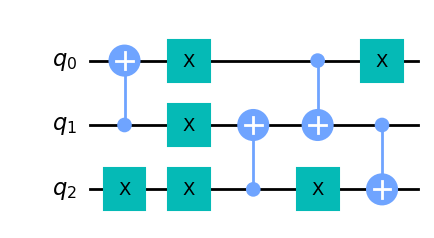

In [124]:
circ = non_ccx_circuits[1665]
circ.draw('mpl')

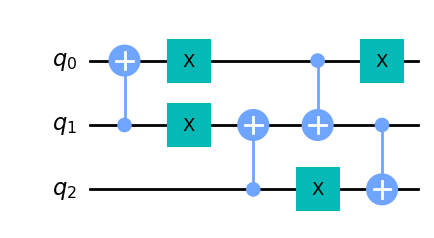

In [125]:
l3_circ = transpile(circ, optimization_level=3)
l3_circ.draw('mpl')

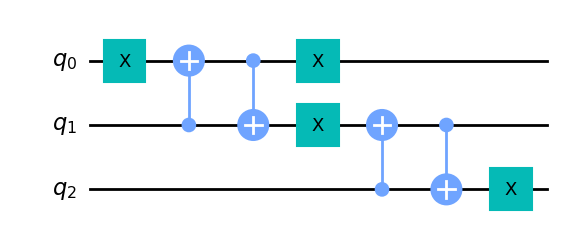

In [106]:
_pass = ThreeLayerOptimization(optimization_pass=3)
_pass.run_dag_opt(circuit_to_dag(circ), 3)
tlc_circ = dag_to_circuit(_pass.dag_optimized)
tlc_circ.draw('mpl')

## Level 2 Internal Evaluation (best for exhaustive in terms of quantum cost reduction)

In [ ]:
reduced_circuits_2 = run_3x5_tests(non_ccx_circuits, 'non_ccx_2_results.csv', 2)
reduced_circuits_2.extend(run_3x5_tests(ccx_circuits, 'ccx_2_results.csv', 2))

In [ ]:
display(len(reduced_circuits_2))

## Run reduced circuits on IBM

In [29]:
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-afrl/air-force-lab/educational',    # Update this line if necessary
    token='insert_token_here'
)

backend_name = 'ibm_sherbrooke'

_pass = ThreeLayerOptimization(optimization_pass=2)

In [1]:
# Function to run TLC using custom pass and return the opt circuit
def tlc_optimize(circ):
    _pass.run_dag_opt(circuit_to_dag(circ), get_custom_pass())
    tlc_circ = dag_to_circuit(_pass.dag_optimized)
    return tlc_circ

In [ ]:
# Take original reduced circuits and optimize using both methods. May be better to update the test functions to save the optimized circuits
# along with the original rather than having to re-optimize here.

original_circuits = reduced_circuits_2.copy()
l3_circuits = reduced_circuits_2.copy()
tlc_circuits = reduced_circuits_2.copy()

l3_circuits = [transpile(circ, optimization_level=3) for circ in reduced_circuits_2]

tlc_circuits = [tlc_optimize(circ) for circ in reduced_circuits_2]

In [ ]:
# Add measurements to all circuits
for circ in l3_circuits:
    circ.measure_all()

for circ in tlc_circuits:
    circ.measure_all()

## Send L3 circuits

In [ ]:
backend = service.backend(backend_name)

batch_size = 300    # Depends on the backend and what access you have
circuits = list(l3_circuits)


# Split circuits into batches
circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

# Send each batch and print the job ID for retrieval.
for batch in circuits_batches:
    l3_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {l3_job.job_id()}")

## Send TLC circuits

In [ ]:
# Same as above with different circuits
backend = service.backend(backend_name)

batch_size = 300
circuits = list(tlc_circuits)

circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

for batch in circuits_batches:
    l3_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {l3_job.job_id()}")

## Send to simulator

In [ ]:
# Same as above with different backend. Because the sim performs as an ideal quantum computer, it doesn't matter which set of circuits we send
# as long as they are equivalent. l3_circuits were chosen arbitrarily

backend = service.backend('simulator_mps')
circuits = list(l3_circuits)

batch_size = 300

# Split circuits into batches
circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

for batch in circuits_batches:
    l3_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {l3_job.job_id()}")

## Random Testing

In [11]:
# Generate circuits
random.seed(42)
circuits = []
range_num_qubits = [10, 7, 5, 3]
range_num_layers = [20, 15, 10, 5]
for num_qubits in range_num_qubits:
    for num_layers in range_num_layers:
        for _ in range(50):
            circuits.append(generate_random_circuit_non_ccx(num_qubits, num_layers))
display(len(circuits))

800

In [13]:
reduced_random_custom = run_random_circuits(circuits, 'random_results_custom_non_ccx.csv', get_custom_pass())

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Iter 0


/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64
Iter 65
Iter 66
Iter 67
Iter 68
Iter 69
Iter 70
Iter 71
Iter 72
Iter 73
Iter 74
Iter 75
Iter 76
Iter 77
Iter 78
Iter 79
Iter 80
Iter 81
Iter 82
Iter 83
Iter 84
Iter 85
Iter 86
Iter 87
Iter 88
Iter 89
Iter 90
Iter 91
Iter 92
Iter 93
Iter 94
Iter 95
Iter 96
Iter 97
Iter 98
Iter 99
Iter 100
Iter 101
Iter 102
Iter 103
Iter 104
Iter 105
Iter 106
Iter 107
Iter 108
Iter 109
Iter 110
Iter 111
Iter 112
Iter 113
Iter 114
Iter 115
Iter 116
Iter 117
Iter 118
Iter 119
Iter 120
Iter 121
Iter 122
Iter 123
I

In [14]:
reduced_random_3 = run_random_circuits(circuits, 'random_results_3_non_ccx.csv', 3)

Iter 0
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64
Iter 65
Iter 66
Iter 67
Iter 68
Iter 69
Iter 70
Iter 71
Iter 72
Iter 73
Iter 74
Iter 75
Iter 76
Iter 77
Iter 78
Iter 79
Iter 80
Iter 81
Iter 82
Iter 83
Iter 84
Iter 85
Iter 86
Iter 87
Iter 88
Iter 89
Iter 90
Iter 91
Iter 92
Iter 93
Iter 94
Iter 95
Iter 96
Iter 97
Iter 98
Iter 99
Iter 100
Iter 101
Iter 102
Iter 103
Iter 104
Iter 105
Iter 106
Iter 107
Iter 108
Iter 109
Iter 110
Iter 111
Iter 112
Iter 113
Iter 114
Iter 115
Iter 116
Iter 117
Iter 118
Iter 119
Iter 120
Iter 121
Iter 122
Ite

In [15]:
reduced_random_2 = run_random_circuits(circuits, 'random_results_2_non_ccx.csv', 2)

Iter 0
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64
Iter 65
Iter 66
Iter 67
Iter 68
Iter 69
Iter 70
Iter 71
Iter 72
Iter 73
Iter 74
Iter 75
Iter 76
Iter 77
Iter 78
Iter 79
Iter 80
Iter 81
Iter 82
Iter 83
Iter 84
Iter 85
Iter 86
Iter 87
Iter 88
Iter 89
Iter 90
Iter 91
Iter 92
Iter 93
Iter 94
Iter 95
Iter 96
Iter 97
Iter 98
Iter 99
Iter 100
Iter 101
Iter 102
Iter 103
Iter 104
Iter 105
Iter 106
Iter 107
Iter 108
Iter 109
Iter 110
Iter 111
Iter 112
Iter 113
Iter 114
Iter 115
Iter 116
Iter 117
Iter 118
Iter 119
Iter 120
Iter 121
Iter 122
Ite

In [18]:
# Number of circuits where L3 cost > TLC cost
print(len(reduced_random_custom))
print(len(reduced_random_3))
print(len(reduced_random_2))

388
381
404


In [19]:
# Get reduced circuits for the TLC config that had the lowest average quantum cost
reduced_random = reduced_random_custom

## Send random to sim and backend (same process as exhaustive circuits above, could reuse those functions)

In [25]:
original_circuits = reduced_random.copy()
l3_circuits = reduced_random.copy()
tlc_circuits = reduced_random.copy()

l3_circuits = [transpile(circ, optimization_level=3) for circ in reduced_random]

tlc_circuits = [tlc_optimize(circ) for circ in reduced_random]

In [26]:
for circ in l3_circuits:
    circ.measure_all()

for circ in tlc_circuits:
    circ.measure_all()

In [27]:
backend = service.backend('simulator_mps')
circuits = list(l3_circuits)

random_sim_ids = []

batch_size = 300

# Split circuits into batches
circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

for batch in circuits_batches:
    sim_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {sim_job.job_id()}")
    random_sim_ids.append(sim_job.job_id())

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Batch job id: cnh4pbnfdd62v39738fg


/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Batch job id: cnh4pd185bk5larujl7g


In [36]:
backend = service.backend('ibm_sherbrooke')
circuits = list(l3_circuits)

random_l3_ids = []

batch_size = 300

# Split circuits into batches
circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

for batch in circuits_batches:
    l3_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {l3_job.job_id()}")
    random_l3_ids.append(l3_job.job_id())

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.

Batch job id: cqhr52w5wd50008zbcsg


/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.

Batch job id: cqhr5b5p36rg0086w2fg


In [37]:
circuits = list(tlc_circuits)

random_tlc_ids = []

# Split circuits into batches
circuits_batches = [circuits[i:i+batch_size] for i in range(0, len(circuits), batch_size)]

for batch in circuits_batches:
    tlc_job = execute(batch, backend, shots=4000)
    print(f"Batch job id: {tlc_job.job_id()}")
    random_tlc_ids.append(tlc_job.job_id())

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.

Batch job id: cqhr68sp36rg0086w2ng


/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.

Batch job id: cqhr6ha5wd50008zbcy0


## Get info from tests

In [143]:
# Store job IDs, would make more sense to store these in a .json or something similar for future tests.
# Tests need to be rerun to collect valid job IDs for your account

# Job orders for exhaustive testing
tlc_order = ['cpqgy181tcz0008mcbhg',
             'cpqgypa1tcz0008mcbjg',
             'cpqgzb50f6rg008x1vy0',
             'cpqh00g1tcz0008mcbk0',
             'cpqh0nj9nad00083kpm0',
             'cpqh1an1tcz0008mcbmg',
             'cpqh1zqd7p30008jv9dg',
             'cpqh2p29nad00083kpng',
             'cpqh3cddmm10008a9s60',
             'cpqh42g0f6rg008x1w00',
             'cpqh4581tcz0008mcbng']

l3_order = ['cpqgpykdmm100080c960',
            'cpqgqkpd7p30008jv980',
            'cpqgr8h0f6rg008x1vv0',
            'cpqgrxksp83g008yavhg',
            'cpqgsje0f6rg008x1vvg',
            'cpqgt78d7p30008jv99g',
            'cpqgtwb1tcz0008mcbh0',
            'cpqgvkesp83g008yavn0',
            'cpqgw9sd7p30008jv9a0',
            'cpqgx0wdmm10008a9s20',
            'cpqgx3c9nad00083kpk0']

sim_order = ['cmorpj8h21vgtqqdee9g',
             'cmorpon79cpiv1d0v4og',
             'cmorpsgh21vgtqqdef60',
             'cmorpuvn6tkp35g0socg',
             'cmorq3aea9rm8b8oekp0',
             'cmorq7f79cpiv1d0v65g',
             'cmorqb4d06qe0i0np6u0',
             'cmorqdthk6gfkoflk850',
             'cmorqg8h21vgtqqdeh8g',
             'cmorqlvn6tkp35g0sr0g',
             'cmorqnn79cpiv1d0v7lg']

In [147]:
# Job orders for random testing (Toffoli)
tlc_order = ['cptfrpa9nad00083r2fg', 
             'cptfscxdmm100080ycc0']

l3_order = ['cptfprv0f6rg008x6t2g',
            'cptfqfnsp83g008aw6p0']

sim_order = ['cmqfkvgh21vgtqqkj820',
             'cmqfl5iea9rm8b8vj41g']

In [38]:
# Job orders for random testing (non-Toffoli)
tlc_order = ['cqh7hxz59d1g008jpxk0', 
             'cqh7j6rp36rg0086tr70']

l3_order = ['cqh7gp25wd50008za310',
            'cqh7gyk59d1g008jpxjg']

sim_order = ['cnh4pbnfdd62v39738fg',
             'cnh4pd185bk5larujl7g']

In [ ]:
# These tests were run due to concerns about the queue time of ibm_sherbrooke

# Job orders for random testing on ibm_brisbane (non-Toffoli)
tlc_order = ['cqhr68sp36rg0086w2ng', 
             'cqhr6ha5wd50008zbcy0']

l3_order = ['cqhr52w5wd50008zbcsg',
            'cqhr5b5p36rg0086w2fg']

In [39]:
# Calculate percent of correct outputs compared to sim outputs
expected_vals = []
tlc_correct = []
l3_correct = []

for i in range(len(sim_order)):
    sim_job = service.runtime.job(sim_order[i])
    tlc_job = service.runtime.job(tlc_order[i])
    l3_job = service.runtime.job(l3_order[i])

    sim_results = sim_job.result().results
    tlc_results = tlc_job.result().results
    l3_results = l3_job.result().results

    sim_result_counts = [result.data.counts for result in sim_results]
    tlc_result_counts = [result.data.counts for result in tlc_results]
    l3_result_counts = [result.data.counts for result in l3_results]

    expected_vals = [next(iter(counts)) for counts in sim_result_counts]

    for j in range(len(expected_vals)):
        expected_val = expected_vals[j]

        if expected_val in tlc_result_counts[j]:
            tlc_correct.append(tlc_result_counts[j][expected_val])
        else:
            tlc_correct.append(0)

        if expected_val in l3_result_counts[j]:
            l3_correct.append(l3_result_counts[j][expected_val])
        else:
            l3_correct.append(0)


In [46]:
# Collect timing data, likely inaccurate because only timing info available is for the entire job.
l3_time = 0
tlc_time = 0

for i in range(len(sim_order)):
    tlc_job = service.runtime.job(tlc_order[i])
    l3_job = service.runtime.job(l3_order[i])

    tlc_results = tlc_job.result().time_taken
    l3_results = l3_job.result().time_taken

    l3_time += l3_results
    tlc_time += tlc_results


In [47]:
# Calculations to find average runtime and compare between circ sets
x = l3_time / (388)
print(x)
y = tlc_time / (388)
print(y)
print(x-y)

1.1586749997371133
1.1644519380154639
-0.005776938278350574


In [40]:
average = sum(tlc_correct) / len(tlc_correct)
average / 4000

0.2061617268041237

In [41]:
average = sum(l3_correct) / len(l3_correct)
average / 4000

0.21532023195876288

In [ ]:
count_tlc_greater_than_l3 = 0

# Check that both lists have the same length
if len(tlc_correct) == len(l3_correct):
    for i in range(len(tlc_correct)):
        if tlc_correct[i] > l3_correct[i]:
            count_tlc_greater_than_l3 += 1

    # Print the count
    print("Number of cases where tlc is greater than l3:", count_tlc_greater_than_l3)
else:
    print("Error: The lists tlc_correct and l3_correct must have the same length.")


## Hardware performance interp and visualization

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
hardware_df = pd.DataFrame()
hardware_df['L3'] = l3_correct
hardware_df['TLC 2'] = tlc_correct

hardware_df['L3'] = (hardware_df['L3'] / 4000) * 100
hardware_df['TLC 2'] = (hardware_df['TLC 2'] / 4000) * 100
hardware_df.describe()

,L3,TLC 2
count,388.000000,388.000000
mean,21.532023,20.616173
std,29.940461,29.729292
min,0.000000,0.000000
25%,0.550000,0.525000
50%,3.637500,2.987500
75%,38.687500,28.900000
max,97.650000,97.875000


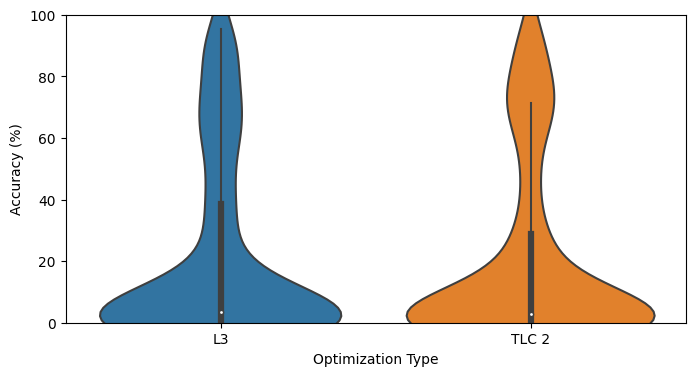

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['L3', 'TLC 2']
data_for_violin = hardware_df[selected_columns]

plt.figure(figsize=(8, 4))
ax = sns.violinplot(data=data_for_violin)

# Set lower y-bound at 0
ax.set_ylim(bottom=0, top=100)

plt.xlabel("Optimization Type")
plt.ylabel("Accuracy (%)")
plt.show()


## Statical tests

In [51]:
from scipy.stats import mannwhitneyu
mannwhitneyu(l3_correct, tlc_correct)

MannwhitneyuResult(statistic=76534.5, pvalue=0.6860440419472104)

In [85]:
mannwhitneyu(l3_correct, tlc_correct)

MannwhitneyuResult(statistic=3874257.5, pvalue=1.937830394107257e-24)